In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import geopandas as gpd
from shapely.geometry import Point
from fiona.crs import from_epsg

In [ ]:
CityLineRequests = pd.read_csv("/content/SYRCityline_Requests_(2021-Present).csv")

In [ ]:
print(CityLineRequests.head(3))

             X            Y        Id  Rating                    Agency_Name  \
0 -8472083.649  5318439.622  10514161       3                 Water & Sewage   
1 -8476508.236  5314388.407  10514193       2  Garbage, Recycling & Graffiti   
2 -8475601.992  5310706.324  10514235       2                        Animals   

         Lat        Lng      Created_at_local  Minutes_to_closed  \
0  43.042478 -76.106022  07/27/2021 - 11:30AM            11485.0   
1  43.015874 -76.145769  07/27/2021 - 11:33AM             4392.0   
2  42.991685 -76.137628  07/27/2021 - 11:39AM             1230.0   

                                        Category Report_Source  ObjectId  
0                         Water-related Concerns  Request Form         1  
1  Large or Bulk Items- Setout notification only  Request Form         2  
2                                       Roadkill  Request Form         3  


In [ ]:
CityLineRequests.info

<bound method DataFrame.info of                  X            Y        Id  Rating  \
0     -8472083.649  5318439.622  10514161       3   
1     -8476508.236  5314388.407  10514193       2   
2     -8475601.992  5310706.324  10514235       2   
3     -8474106.730  5317636.935  10514252       2   
4     -8474106.730  5317636.935  10514270       2   
...            ...          ...       ...     ...   
68500 -8476069.332  5322442.990  15078020       1   
68501 -8477156.167  5319366.254  15078030       2   
68502 -8475437.772  5322138.088  15078033       2   
68503 -8473116.605  5320547.984  15078040       2   
68504 -8474540.607  5321535.628  15078054       2   

                                  Agency_Name        Lat        Lng  \
0                              Water & Sewage  43.042478 -76.106022   
1               Garbage, Recycling & Graffiti  43.015874 -76.145769   
2                                     Animals  42.991685 -76.137628   
3               Garbage, Recycling & Graffiti  43.037208 -76.124196   
4               Garbage, Recycling & Graffiti  43.037208 -76.124196   
...                                       ...        ...        ...   
68500  Green Spaces, Trees & Public Utilities  43.068755 -76.141826   
68501           Garbage, Recycling & Graffiti  43.048561 -76.151590   
68502  Green Spaces, Trees & Public Utilities  43.066755 -76.136153   
68503           Garbage, Recycling & Graffiti  43.056318 -76.115302   
68504                          Water & Sewage  43.062801 -76.128094   

           Created_at_local  Minutes_to_closed  \
0      07/27/2021 - 11:30AM            11485.0   
1      07/27/2021 - 11:33AM             4392.0   
2      07/27/2021 - 11:39AM             1230.0   
3      07/27/2021 - 11:41AM            31840.0   
4      07/27/2021 - 11:43AM            30103.0   
...                     ...                ...   
68500  08/13/2023 - 02:12PM                NaN   
68501  08/13/2023 - 02:15PM             1370.0   
68502  08/13/2023 - 02:16PM                NaN   
68503  08/13/2023 - 02:17PM             1652.0   
68504  08/13/2023 - 02:21PM             2434.0   

                                            Category Report_Source  ObjectId  
0                             Water-related Concerns  Request Form         1  
1      Large or Bulk Items- Setout notification only  Request Form         2  
2                                           Roadkill  Request Form         3  
3      Large or Bulk Items- Setout notification only  Request Form         4  
4                                Construction Debris  Request Form         5  
...                                              ...           ...       ...  
68500                          Tree Care and Removal        iPhone     68501  
68501                   Report Litter on Public Land        iPhone     68502  
68502                          Tree Care and Removal        iPhone     68503  
68503                                Illegal Setouts       Android     68504  
68504                      Sewer Back-ups (INTERNAL)  Request Form     68505  

[68505 rows x 12 columns]>

In [ ]:
CityLineRequests['Created_at_local'] = pd.to_datetime(CityLineRequests['Created_at_local'], format='%m/%d/%Y - %I:%M%p')

CityLineRequests['Year'] = CityLineRequests['Created_at_local'].dt.year

print(CityLineRequests)

                 X            Y        Id  Rating  \
0     -8472083.649  5318439.622  10514161       3   
1     -8476508.236  5314388.407  10514193       2   
2     -8475601.992  5310706.324  10514235       2   
3     -8474106.730  5317636.935  10514252       2   
4     -8474106.730  5317636.935  10514270       2   
...            ...          ...       ...     ...   
68500 -8476069.332  5322442.990  15078020       1   
68501 -8477156.167  5319366.254  15078030       2   
68502 -8475437.772  5322138.088  15078033       2   
68503 -8473116.605  5320547.984  15078040       2   
68504 -8474540.607  5321535.628  15078054       2   

                                  Agency_Name        Lat        Lng  \
0                              Water & Sewage  43.042478 -76.106022   
1               Garbage, Recycling & Graffiti  43.015874 -76.145769   
2                                     Animals  42.991685 -76.137628   
3               Garbage, Recycling & Graffiti  43.037208 -76.124196   
4       

In [ ]:

CityLineRequest_Jan2Jul = CityLineRequests[CityLineRequests['Created_at_local'].dt.month <= 7]


In [ ]:
CityLineRequest_Jan2Jul = CityLineRequests[CityLineRequests['Year'] != 2021]

In [ ]:
print(CityLineRequest_Jan2Jul['Category'].describe())

count                                             53718
unique                                               60
top       Large or Bulk Items- Setout notification only
freq                                              15764
Name: Category, dtype: object


In [ ]:
selected_categories = ["Sidewalks", "Potholes", "Streetlights", "Traffic & Parking Signs", "Snow & Ice"]


CityLineTransportRequests_Jan2Jul = CityLineRequest_Jan2Jul[CityLineRequest_Jan2Jul["Category"].isin(selected_categories)]

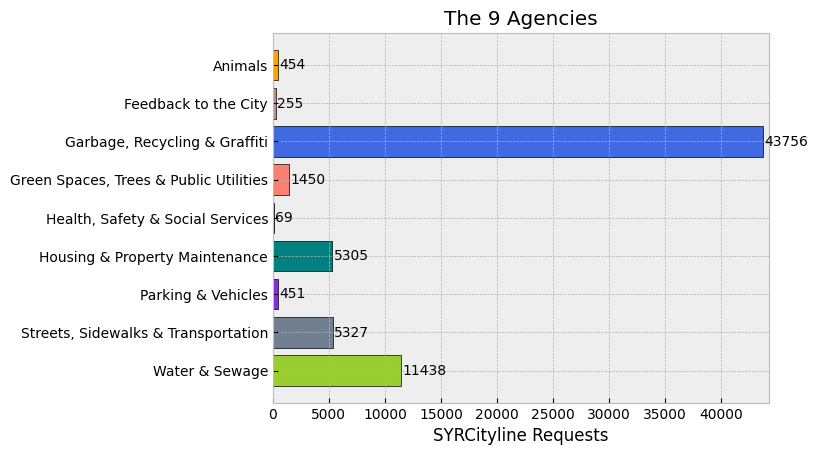

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')
fig, ax = plt.subplots()

agency_counts = CityLineRequests['Agency_Name'].value_counts()


agencies = ('Animals', 'Feedback to the City', 'Garbage, Recycling & Graffiti',
            'Green Spaces, Trees & Public Utilities', 'Health, Safety & Social Services',
            'Housing & Property Maintenance', 'Parking & Vehicles',
            'Streets, Sidewalks & Transportation', 'Water & Sewage')

requests = [agency_counts[agency] for agency in agencies]

colors = ['orange', 'rosybrown', 'royalblue', 'salmon', 'black', 'teal', 'blueviolet', 'slategray', 'yellowgreen']

y_pos = np.arange(len(agencies))
agencies_bars = ax.barh(y_pos, requests, align='center', color=colors, edgecolor='black')

for i, v in enumerate(requests):
    ax.text(v + 100, i, str(v), color='black', va='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(agencies)
ax.invert_yaxis()
ax.set_xlabel('SYRCityline Requests')
ax.set_title('The 9 Agencies')

plt.xlim(0, max(requests) + 500)
plt.show()

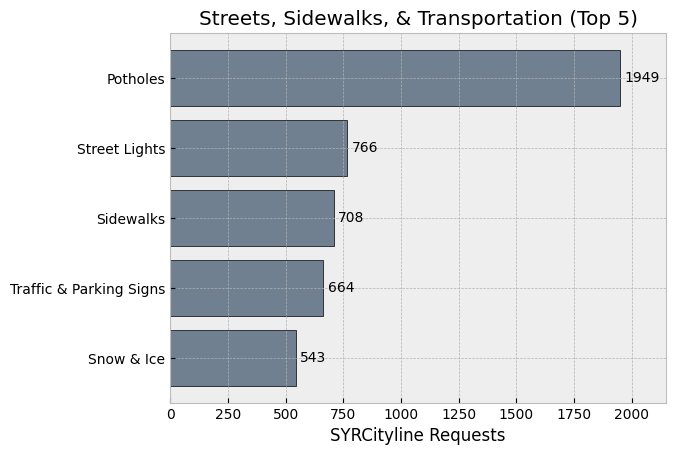

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Category_of_interest = ['Potholes', 'Street Lights', 'Sidewalks', 'Traffic & Parking Signs', 'Snow & Ice']


filtered_df = CityLineRequests[CityLineRequests['Category'].isin(Category_of_interest)]
Category_counts = filtered_df['Category'].value_counts().reindex(Category_of_interest, fill_value=0)

plt.style.use('bmh')
fig, ax = plt.subplots()

Categories = Category_counts.index.tolist()
requests = Category_counts.values.tolist()

y_pos = np.arange(len(Categories))
agencies_bars = ax.barh(y_pos, requests, align='center', color='slategray', edgecolor='black')

for i, v in enumerate(requests):
    ax.text(v + 20, i, str(v), color='black', va='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(Categories)
ax.invert_yaxis()
ax.set_xlabel('SYRCityline Requests')
ax.set_title('Streets, Sidewalks, & Transportation (Top 5)')

plt.xlim(0, max(requests) + 200)
plt.show()

In [ ]:
CityLineRequests["Days_to_Fix"] = CityLineRequests["Minutes_to_closed"]/1440

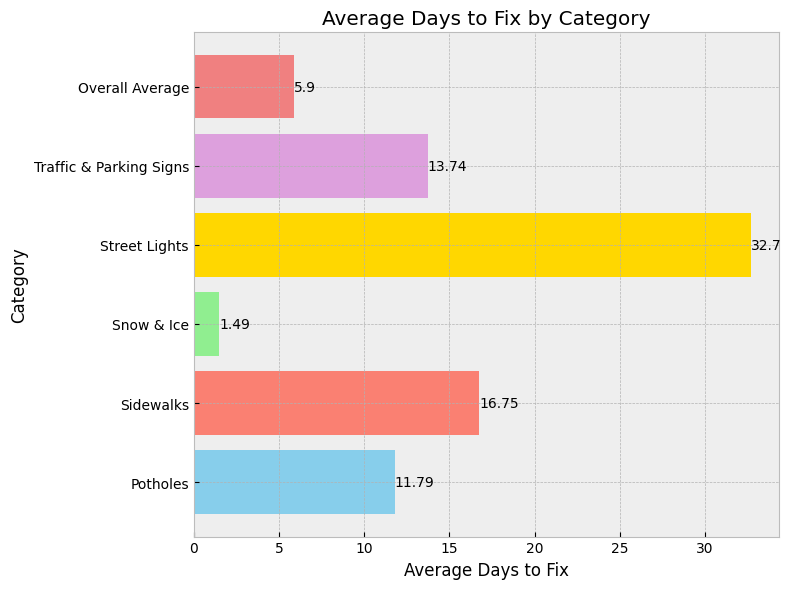

In [ ]:

selected_categories = ['Streets, Sidewalks, & Transportation', 'Potholes', 'Street Lights', 'Sidewalks', 'Traffic & Parking Signs', 'Snow & Ice']
filtered_data = CityLineRequests[CityLineRequests['Category'].isin(selected_categories)]

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'plum', 'lightcoral', 'lightblue']

average_days_to_fix = filtered_data.groupby('Category')['Days_to_Fix'].mean().reset_index()

Average_days_to_fix = CityLineRequests['Days_to_Fix'].mean()

overall_average_row = pd.DataFrame([{'Category': 'Overall Average', 'Days_to_Fix': Average_days_to_fix}])
average_days_to_fix = pd.concat([average_days_to_fix, overall_average_row])


plt.figure(figsize=(8, 6))
bars = plt.barh(average_days_to_fix['Category'], average_days_to_fix['Days_to_Fix'], color= colors)

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height() / 2, round(yval, 2), va='center', ha='left')

plt.xlabel('Average Days to Fix')
plt.ylabel('Category')
plt.title('Average Days to Fix by Category')
plt.tight_layout()
plt.show()

<Figure size 1440x960 with 0 Axes>

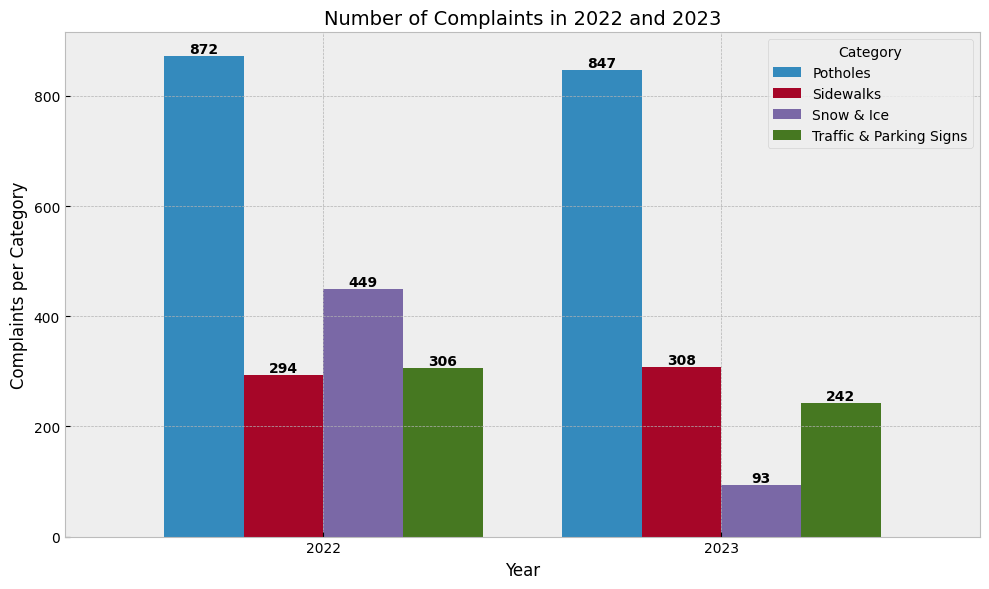

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = CityLineTransportRequests_Jan2Jul.groupby(['Year', 'Category']).size().unstack()


plt.figure(figsize=(12, 8), dpi=120)


ax = grouped.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Complaints per Category', fontsize=12)
plt.title('Number of Complaints in 2022 and 2023', fontsize=14)
plt.legend(title='Category', fontsize=10)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', weight='bold')


plt.tight_layout()
plt.show()

In [ ]:
CityLineRequests.dropna(subset=['Minutes_to_closed'], inplace=True)

In [ ]:
CityLineRequests.dropna(subset=['Agency_Name'], inplace=True)

In [ ]:
CityLineRequests_2023 = CityLineRequests[CityLineRequests["Year"]==2023]

In [ ]:
print(CityLineRequests.columns)

Index(['X', 'Y', 'Id', 'Rating', 'Agency_Name', 'Lat', 'Lng',
       'Created_at_local', 'Minutes_to_closed', 'Category', 'Report_Source',
       'ObjectId', 'Year', 'Days_to_Fix'],
      dtype='object')


In [ ]:
CityLineRequests_2023['Days_to_close'] = CityLineRequests_2023['Minutes_to_closed']/1440

<ipython-input-19-e7b992f5eb09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CityLineRequests_2023['Days_to_close'] = CityLineRequests_2023['Minutes_to_closed']/1440


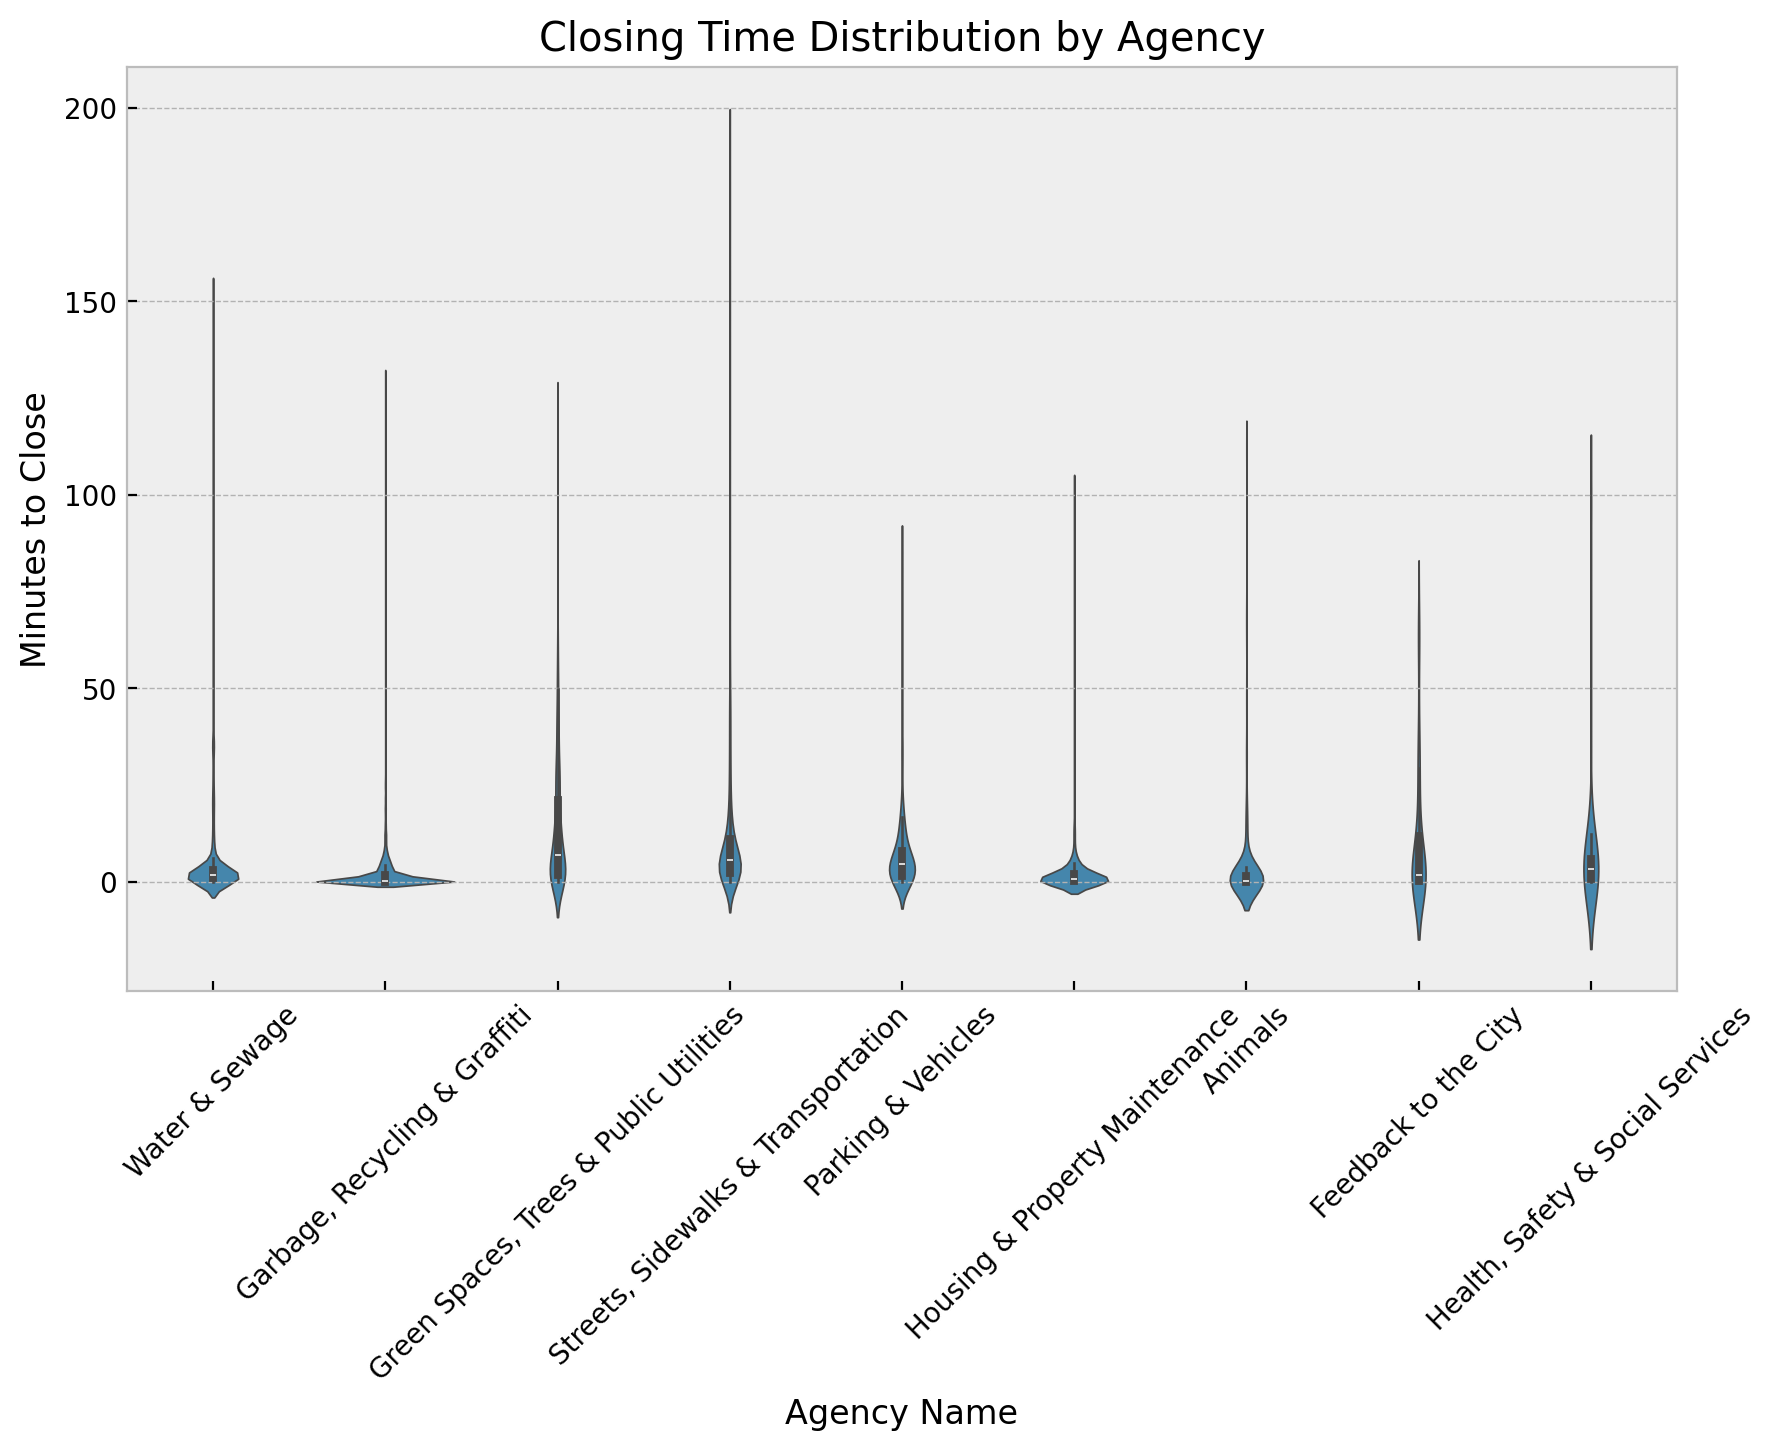

In [ ]:
plt.figure(figsize=(10, 6), dpi=200)
sns.violinplot(x='Agency_Name', y='Days_to_close', data=CityLineRequests_2023)
plt.xticks(rotation=45)
plt.title('Closing Time Distribution by Agency')
plt.xlabel('Agency Name')
plt.ylabel('Minutes to Close')
plt.show()

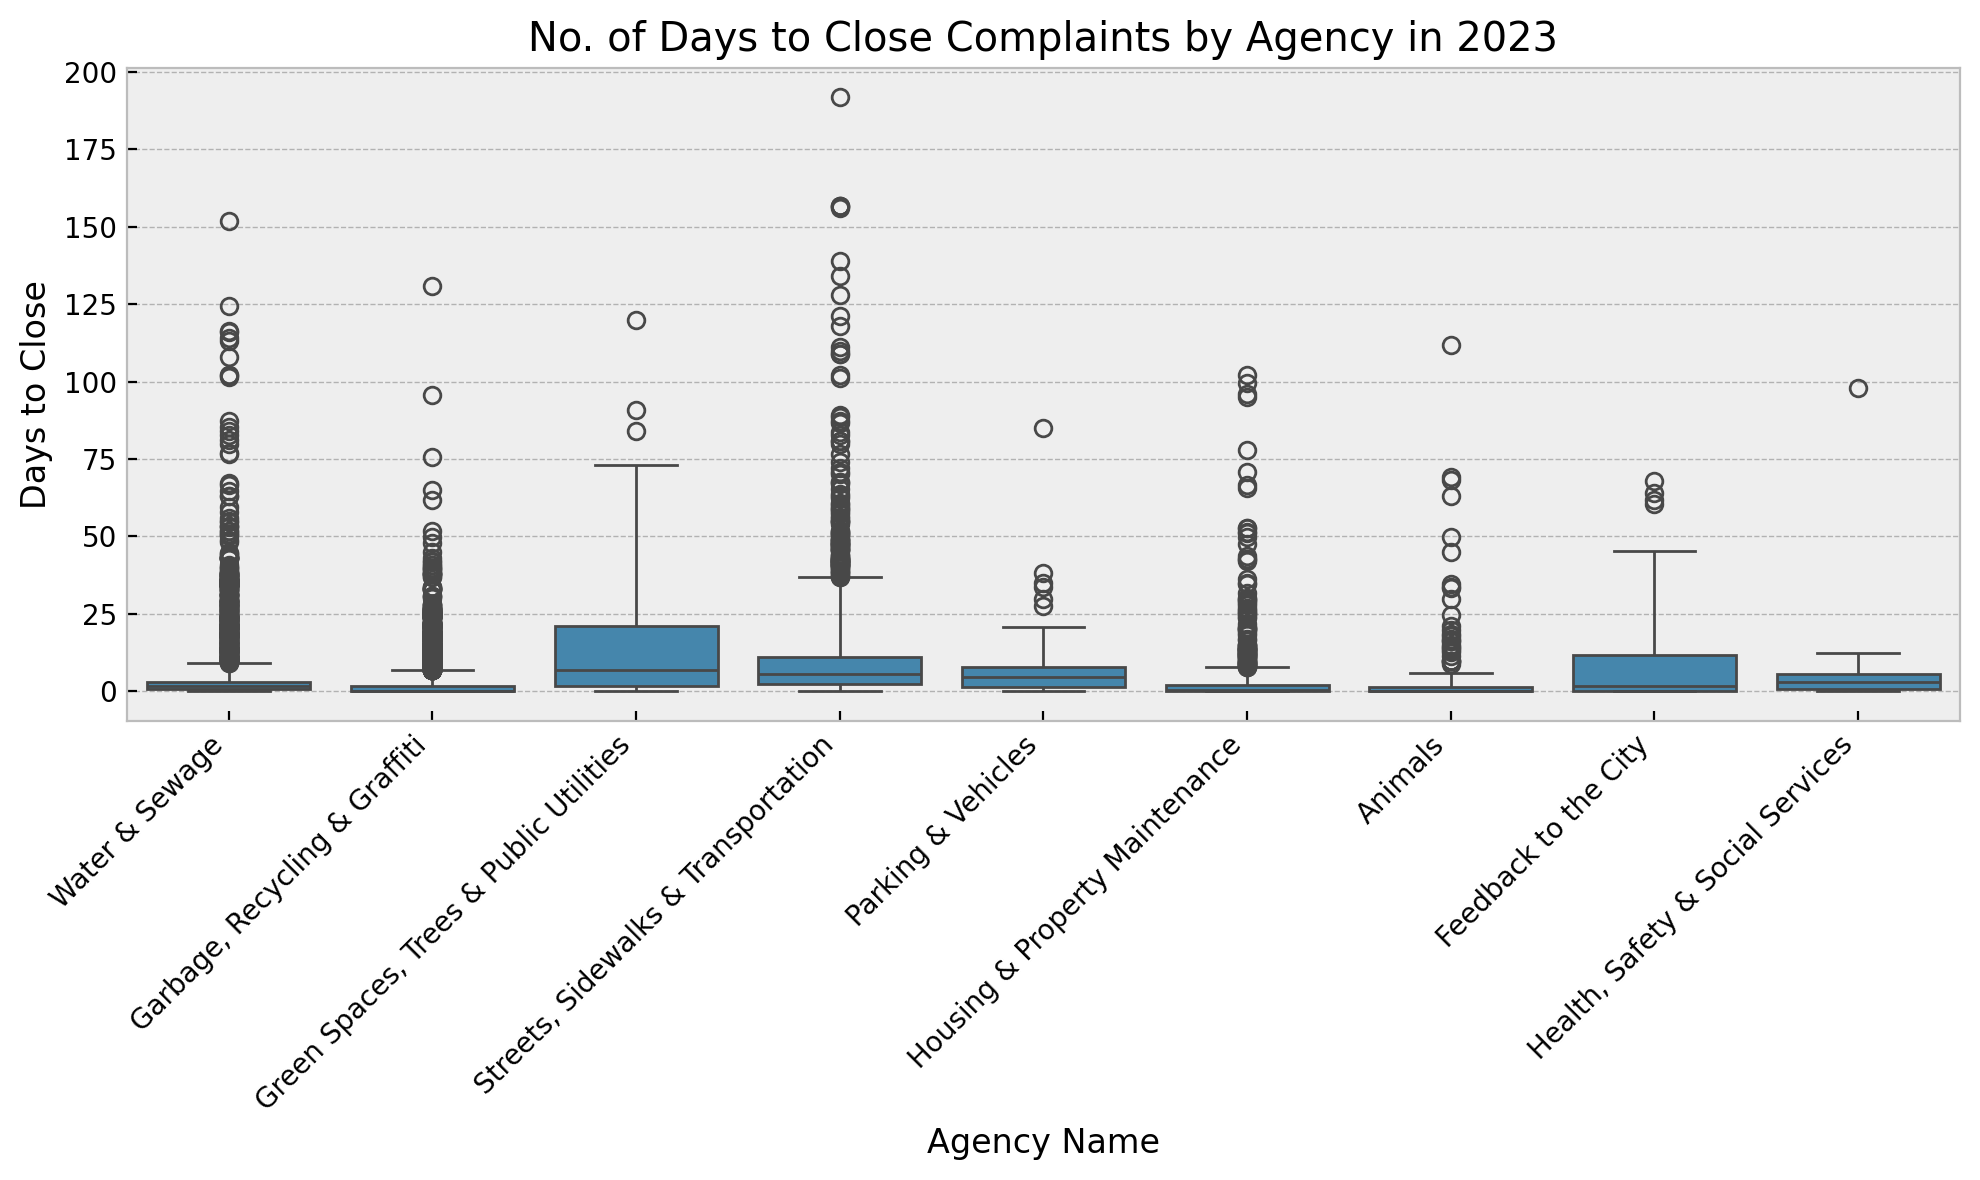

In [ ]:
plt.figure(figsize=(10, 6), dpi=200)

sns.boxplot(x='Agency_Name', y='Days_to_close', data=CityLineRequests_2023, whis=3)  # Adjust 'whis' value as needed
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment of labels



plt.title('No. of Days to Close Complaints by Agency in 2023')
plt.xlabel('Agency Name')
plt.ylabel('Days to Close')

plt.tight_layout()
plt.show()

In [ ]:
print(CityLineRequests_2023.head(3))

                 X            Y        Id  Rating  \
46410 -8476929.535  5313693.831  13876839       2   
46416 -8480820.939  5319836.059  13876840       2   
46424 -8469301.839  5317642.965  13877089       2   

                         Agency_Name        Lat        Lng  \
46410                 Water & Sewage  43.011312 -76.149554   
46416                 Water & Sewage  43.051645 -76.184511   
46424  Garbage, Recycling & Graffiti  43.037247 -76.081033   

         Created_at_local  Minutes_to_closed  \
46410 2023-01-01 01:19:00             3214.0   
46416 2023-01-01 01:20:00             3235.0   
46424 2023-01-01 09:23:00             3677.0   

                                        Category Report_Source  ObjectId  \
46410                     Sewer-related Concerns  Request Form     46411   
46416                     Sewer-related Concerns  Request Form     46417   
46424  Recycling (pick up that has been skipped)        Portal     46425   

       Year  Days_to_Fix  Days_to_close 

In [ ]:
SyracuseMap = gpd.read_file("/content/Census_Block_Groups_in_Syracuse%2C_NY_(2010).shp")

In [ ]:
SyracuseMap.plot

In [ ]:
Potholes = CityLineRequests[CityLineRequests['Category']=='Potholes']

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-29-300d6250fc7d>:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


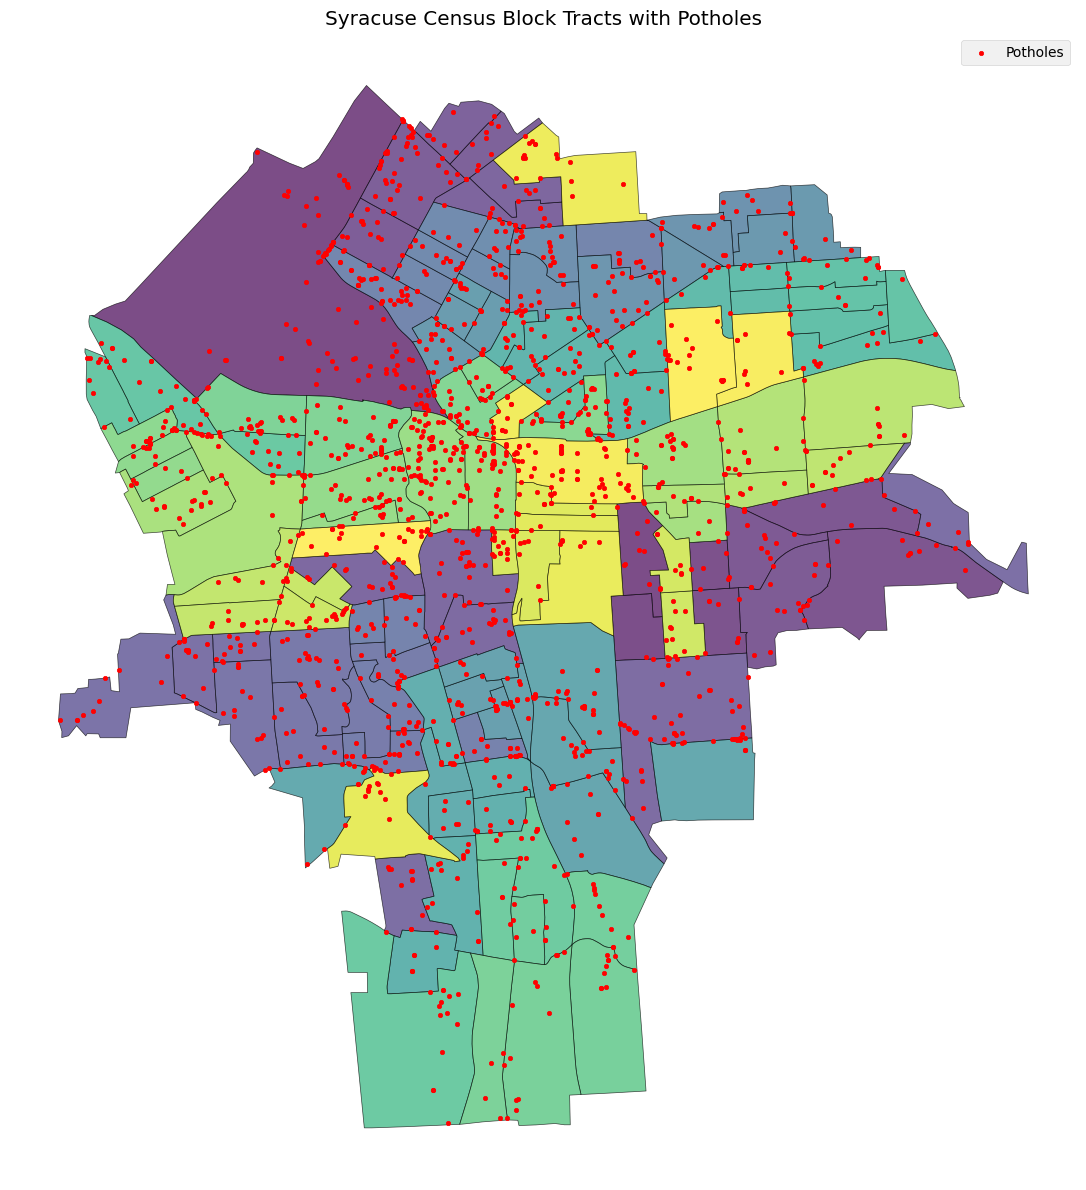

In [ ]:
geometry = [Point(xy) for xy in zip(Potholes['Lng'], Potholes['Lat'])]
crs = 'EPSG:4326'  # Using WGS84 coordinate system for lat/long
points_geo_df = gpd.GeoDataFrame(Potholes, crs=crs, geometry=geometry)

# Reproject the points GeoDataFrame to EPSG:3857 to match the CRS of the shapefile
points_geo_df = points_geo_df.to_crs('EPSG:3857')

# Perform a spatial join between points and census block tracts
joined_data = gpd.sjoin(SyracuseMap, points_geo_df, how='inner', op='intersects')

# Plot the Syracuse census block tracts and points together
fig, ax = plt.subplots(figsize=(14, 12))

SyracuseMap.plot(ax=ax, cmap='viridis', edgecolor='black', alpha=0.7, legend=True, label='Syracuse Tracts')
points_geo_df.plot(ax=ax, markersize=10, color='red', label='Potholes')

plt.title('Syracuse Census Block Tracts with Potholes')
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()